In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
%matplotlib inline

## parameter analysis

In [45]:
lambda_ = pd.DataFrame(columns = ['lambda','rmse', 'mae'])
lambda_.set_index('lambda', inplace = True)

In [46]:
lambda_.loc['0.0'] = [44.66,30.05]
lambda_.loc['0.2'] = [45.88,30.30]
lambda_.loc['0.4'] = [44.56,29.84]
lambda_.loc['0.6'] = [44.88,30.19]
lambda_.loc['0.8'] = [44.64,29.89]

In [47]:
lambda_

,rmse,mae
lambda,,
0.0,44.66,30.05
0.2,45.88,30.30
0.4,44.56,29.84
0.6,44.88,30.19
0.8,44.64,29.89


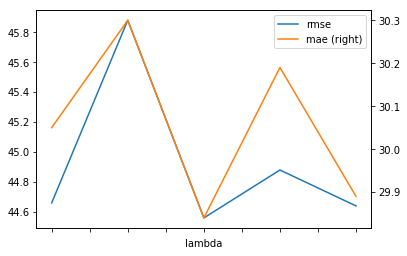

In [53]:
lambda_['rmse'].plot(legend=True)
lambda_['mae'].plot(legend=True,secondary_y=True)
plt.xticks = lambda_.index

## multi-step prediction

In [181]:
data = h5.File('../src/train_test_set_en6_de6_Nov_neighbor_new.h5','r')

In [184]:
encode_series = data['test_encoder_input'][1,0,:,0]

In [186]:
prediction = pd.DataFrame(columns = ['ground truth','arima', 'lstm','seq2seq'])

In [187]:
ground_truth = np.load('../src/src/arima_tests_step6.npy')
arima_pred = np.load('../src/src/arima_predictins_step6.npy')
seq2seq_pred = np.load('../src/seq2seq_de_6_pred.npy')
lstm_pred = np.load('../src/lstm_de_6_pred.npy')
MAM_pred = np.load('../src/MAModel-global_de_6_pred.npy')

In [715]:
grid =2
pos = 6+144*3#500

In [716]:
prediction['ground truth'] = ground_truth[grid,pos]
prediction['arima'] = arima_pred[grid,pos]
prediction['seq2seq'] = seq2seq_pred[grid,pos]
prediction['lstm'] = lstm_pred[grid,pos]
prediction['MAModel'] = MAM_pred[grid,pos]

In [717]:
prediction

,ground truth,arima,lstm,seq2seq,MAModel
0,55.367791,37.157251,34.334932,35.448015,39.492271
1,30.991627,34.628070,34.013414,37.954194,31.639002
2,30.267174,39.143707,33.122177,40.009101,29.175949
3,24.943642,37.798734,32.544202,41.332799,29.070841
4,25.605524,41.320857,31.935928,42.644414,28.880110
5,25.423698,40.800227,31.375794,43.667230,27.260141


Text(0,0.5,'Traffic[MB]')

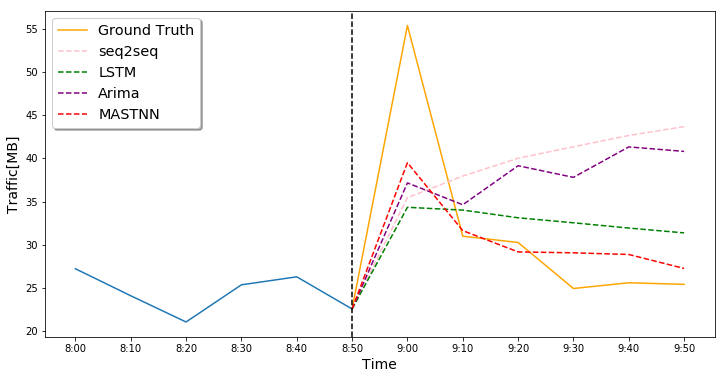

In [721]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(0,6),encode_series)
ax.plot(range(5,12),[encode_series[-1]]+prediction['ground truth'].values.tolist(), color = 'orange',label ='Ground Truth')
ax.plot(range(5,12),[encode_series[-1]]+prediction['seq2seq'].values.tolist(), color = 'pink', linestyle = '--',label ='seq2seq')
ax.plot(range(5,12),[encode_series[-1]]+prediction['lstm'].values.tolist(), color = 'green', linestyle = '--',label ='LSTM')
ax.plot(range(5,12),[encode_series[-1]]+prediction['arima'].values.tolist(), color = 'purple', linestyle = '--',label ='Arima')
ax.plot(range(5,12),[encode_series[-1]]+prediction['MAModel'].values.tolist(), color = 'red', linestyle = '--',label ='MASTNN')
ax.axvline(5,color='black',linestyle='--')
ax.set_xticks(range(12))
ax.set_xticklabels(['8:00','8:10','8:20','8:30','8:40','8:50','9:00','9:10','9:20','9:30','9:40','9:50'])
ax.legend(loc='best', shadow=True, fontsize='x-large')
plt.xlabel("Time",size = 14)
plt.ylabel("Traffic[MB]",size = 14)

## training time comparison

In [302]:
training_time = pd.DataFrame(columns = ['samples','MASTNN', 'STN'])

In [303]:
training_time['samples'] = [0,253800,1161000,2068200,2975400]
training_time['STN'] = [0,23,104,188,260]
training_time['MASTNN'] = [0,16,60,101,144]
training_time.set_index('samples', inplace = True)

Text(0.5,0,'Sample Numbers')

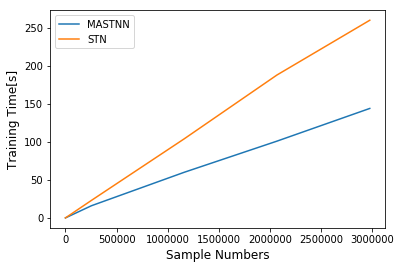

In [308]:
training_time['MASTNN'].plot(legend=True)
training_time['STN'].plot(legend=True)
plt.ylabel("Training Time[s]",size = 12)
plt.xlabel("Sample Numbers",size = 12)

# effect of aux data

In [346]:
index = ['without auxiliary data', 'with auxiliary data']
aux_plot = pd.DataFrame(columns = ['LSTM', 'Seq2seq'], index = index)

In [347]:
aux_plot['LSTM'] = [46.75,45.54]
aux_plot['Seq2seq'] = [46.69, 45.35]

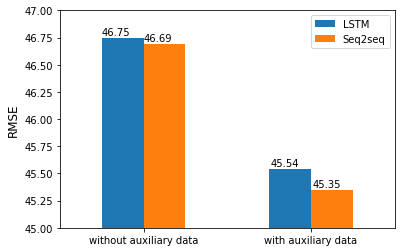

In [510]:
ax = aux_plot.plot.bar(rot=0)
plt.ylim(45,47)
plt.ylabel("RMSE",size = 12)
plt.xlabel("",size = 12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01,p.get_height()*1.0005))

In [349]:
import h5py as h5

In [353]:
f1 = h5.File('../data/processed/Nov_internet_data_t10_s3030_4070.h5','r')
f2 = h5.File('../data/processed/Nov_call_data_t10_s3030_4070.h5','r')
f3 = h5.File('../data/processed/Nov_sms_data_t10_s3030_4070.h5','r')

In [397]:
from datetime import datetime
index = [datetime.fromtimestamp(int(x.decode("utf-8"))/1000).__str__() for x in f1['date'].value]

In [418]:
usage_data = pd.DataFrame(columns = ['internet', 'sms-in','sms-out','call-in','call-out','time'])

In [485]:
gr = 20
gc = 20
usage_data['internet'] = f1['data'][:,0,gr,gc]
usage_data['sms-in'] = f2['data'][:,0,gr,gc]
usage_data['sms-out'] = f2['data'][:,1,gr,gc]
usage_data['call-in'] = f3['data'][:,0,gr,gc]
usage_data['call-out'] = f3['data'][:,1,gr,gc]
usage_data['time'] = index

In [452]:
index

['2013-11-01 07:00:00',
 '2013-11-01 07:10:00',
 '2013-11-01 07:20:00',
 '2013-11-01 07:30:00',
 '2013-11-01 07:40:00',
 '2013-11-01 07:50:00',
 '2013-11-01 08:00:00',
 '2013-11-01 08:10:00',
 '2013-11-01 08:20:00',
 '2013-11-01 08:30:00',
 '2013-11-01 08:40:00',
 '2013-11-01 08:50:00',
 '2013-11-01 09:00:00',
 '2013-11-01 09:10:00',
 '2013-11-01 09:20:00',
 '2013-11-01 09:30:00',
 '2013-11-01 09:40:00',
 '2013-11-01 09:50:00',
 '2013-11-01 10:00:00',
 '2013-11-01 10:10:00',
 '2013-11-01 10:20:00',
 '2013-11-01 10:30:00',
 '2013-11-01 10:40:00',
 '2013-11-01 10:50:00',
 '2013-11-01 11:00:00',
 '2013-11-01 11:10:00',
 '2013-11-01 11:20:00',
 '2013-11-01 11:30:00',
 '2013-11-01 11:40:00',
 '2013-11-01 11:50:00',
 '2013-11-01 12:00:00',
 '2013-11-01 12:10:00',
 '2013-11-01 12:20:00',
 '2013-11-01 12:30:00',
 '2013-11-01 12:40:00',
 '2013-11-01 12:50:00',
 '2013-11-01 13:00:00',
 '2013-11-01 13:10:00',
 '2013-11-01 13:20:00',
 '2013-11-01 13:30:00',
 '2013-11-01 13:40:00',
 '2013-11-01 13:

In [416]:
usage_data

,internet,sms-in,sms-out,call-in,call-out
2013-11-01 07:00:00,290.643170,7.361934,8.150562,14.154940,8.336159
2013-11-01 07:10:00,281.836963,4.866124,5.069813,7.888288,4.989667
2013-11-01 07:20:00,286.341945,6.025121,4.823914,8.900013,6.051342
2013-11-01 07:30:00,252.828269,5.485888,2.814628,6.466374,1.531576
2013-11-01 07:40:00,257.674832,3.649588,5.775709,5.568586,1.637805
2013-11-01 07:50:00,253.101261,4.341257,2.465381,10.359724,4.694112
2013-11-01 08:00:00,234.292329,2.603831,1.756260,6.481964,3.986768
2013-11-01 08:10:00,208.405789,1.781056,1.963332,4.175982,3.792449
2013-11-01 08:20:00,222.002369,1.194895,1.762994,3.853835,1.109021
2013-11-01 08:30:00,218.499451,1.375452,1.892578,3.318941,2.741113


In [478]:
index[144*3-42]

'2013-11-04 00:00:00'

Text(0,0.5,'Traffic[MB]')

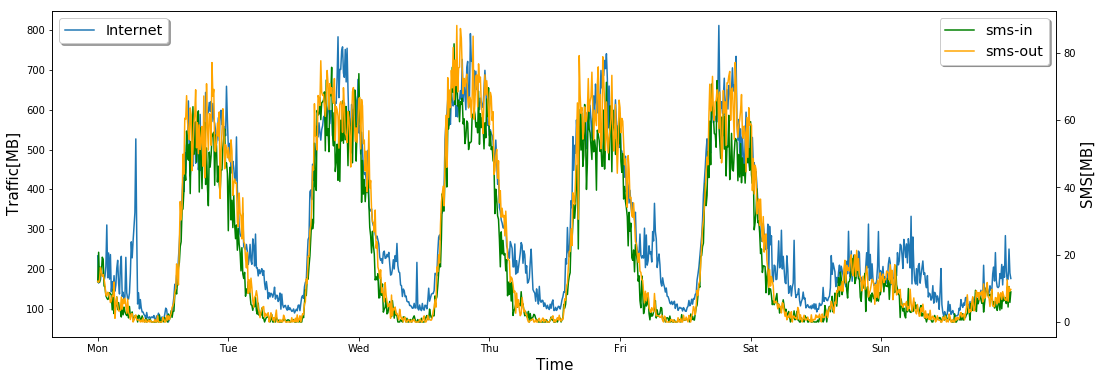

In [502]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(range(0,1008),usage_data[144*3-42:144*3-42+1008]['internet'],label = 'Internet')
ax2 = ax.twinx()
ax2.plot(range(0,1008),usage_data[144*3-42:144*3-42+1008]['sms-in'],color='green',label='sms-in')
ax2.plot(range(0,1008),usage_data[144*3-42:144*3-42+1008]['sms-out'],color='orange',label='sms-out')
ax.set_xticks(range(0,1008,144))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.legend(loc=2, shadow=True, fontsize='x-large')
ax2.legend(loc=1, shadow=True, fontsize='x-large')
ax.set_xlabel("Time",size = 15)
ax2.set_ylabel("SMS[MB]",size = 15)
ax.set_ylabel("Traffic[MB]",size = 15)

Text(0.5,0,'Time')

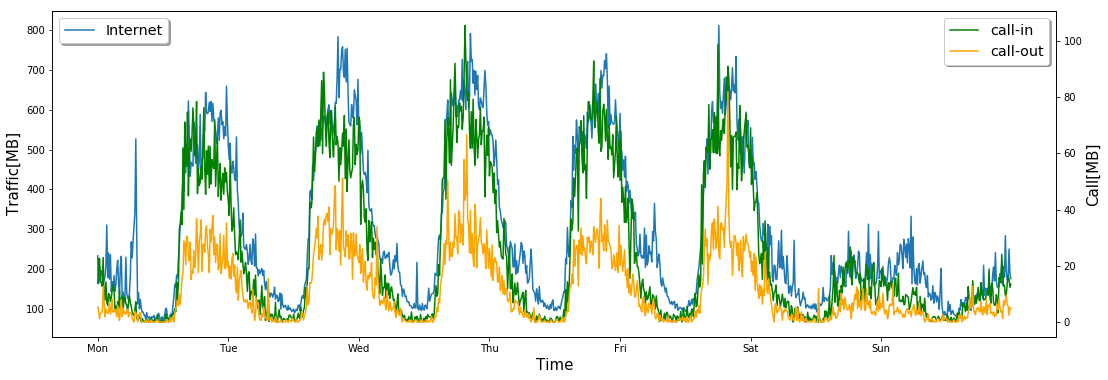

In [503]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(range(0,1008),usage_data[144*3-42:144*3-42+1008]['internet'],label = 'Internet')
ax2 = ax.twinx()
ax2.plot(range(0,1008),usage_data[144*3-42:144*3-42+1008]['call-in'],color='green',label='call-in')
ax2.plot(range(0,1008),usage_data[144*3-42:144*3-42+1008]['call-out'],color='orange',label='call-out')
ax.set_xticks(range(0,1008,144))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.legend(loc=2, shadow=True, fontsize='x-large')
ax2.legend(loc=1, shadow=True, fontsize='x-large')
plt.xlabel("Time",size = 15)
ax2.set_ylabel("Call[MB]",size = 15)
ax.set_ylabel("Traffic[MB]",size = 15)
ax.set_xlabel("Time",size = 15)

## predictin result comarison

In [ ]:
MASTNN_test = np.load('../src/testdata/MAModel-global_en_6_de_1_test.npy')
MASTNN_pred = np.load('../src/testdata/MAModel-global_en6_de_1_pred.npy')
stn_test = np.load('../src/stn_testY.npy')
stn_pred = np.load('../src/stn_prediction.npy')
assert (stn_test==MASTNN_test).all()

In [629]:
MASTNN_test = np.load('../src/MAModel-global_de_6_test.npy')
MASTNN_pred = np.load('../src/MAModel-global_de_6_pred.npy')
stn_test = np.load('../src/stn_testY.npy')
stn_pred = np.load('../src/stn_prediction.npy')

In [630]:
testScores_rmse2 = [(math.sqrt(mean_squared_error(MASTNN_test[grid,:].flatten(), MASTNN_pred[grid,:].flatten()))) for grid,_ in enumerate(MASTNN_pred)]

In [631]:
np.argsort(testScores_rmse2)

array([842, 810, 720, 841, 872, 840,  25, 870, 570, 871,  59, 540, 722,
        60, 752, 782, 812, 541, 721, 691, 811, 631, 780, 781, 751, 750,
        89,  56, 783,   0, 150, 690, 661, 571, 510, 180, 843, 753,  55,
       600, 120,  30,   2,  61,  54, 210,  31, 601, 209, 119,  29,   1,
       813, 240, 511, 692, 630, 207, 149, 206, 118, 239, 662, 660,  88,
       745, 238,  87, 205, 179, 144, 414, 117, 146, 145, 236, 172, 444,
       817, 176, 178, 267, 237,  85, 175, 174,  24, 632, 202, 325, 204,
       693, 799, 295, 572, 834, 602, 148, 177, 266, 573, 787, 835, 673,
        84, 643, 836, 147,  86, 746, 733, 703, 173, 265, 704, 734, 674,
       805,  26,   5,   4,   3, 235, 114, 151, 788, 503, 864,  32,   6,
       744, 355, 354, 384, 723, 474, 443, 873, 845, 270, 814, 208, 356,
       542, 815, 502, 865, 875, 603, 663, 181, 487, 504, 863, 445, 548,
       754, 793, 794, 473, 809, 761,  96, 893, 867, 764, 860, 818, 413,
       800, 874, 894, 763, 792,   8, 488, 302, 844, 300, 765, 23

In [587]:
import math
from sklearn.metrics import mean_squared_error

In [588]:
testScores_rmse = [(math.sqrt(mean_squared_error(MASTNN_test[grid,:].flatten(), MASTNN_pred[grid,:].flatten()))) for grid,_ in enumerate(MASTNN_pred)]

In [589]:
np.argsort(testScores_rmse)

array([842, 810, 720, 871, 783, 841, 691, 870, 840, 722, 812, 811, 752,
       782, 721, 750, 780, 751, 781, 753, 872, 843, 690, 631, 571, 813,
       570, 661, 692, 600, 540, 541, 601, 630, 510, 660,   2,  59, 511,
        25, 662, 745,  56,   1, 150,  31,  61, 120, 119, 206, 207,  89,
       117, 145,  54, 414, 817, 444, 174,   0,  60, 204, 146, 205, 118,
       632, 172,  24, 787, 238, 149, 693, 209,  55,  29, 180,  88, 144,
       176, 836, 175, 325, 239, 236, 834, 237, 835,   3, 734, 240, 210,
       202,  87, 173, 177, 295,   5,   4, 643, 673, 746, 147, 265, 267,
       703, 572, 733, 573,  30, 178, 704, 788, 602, 674,   6,  32,  84,
        85, 799, 805, 266, 503, 179, 148, 443, 235, 355, 723, 603, 151,
       865, 845, 354, 864, 873, 794, 663, 744, 270,  26, 542, 875, 474,
        86, 764, 548, 413, 384, 814, 356, 487, 867, 502, 114, 445, 815,
       473, 504, 208, 181, 809, 793, 754, 232, 818, 761, 844, 874, 863,
       233, 715, 893, 860, 868, 792, 152, 302,   8, 635, 234, 76

In [606]:
grid = 414
stn_p = stn_pred[grid,:,0]
mastnn_p = MASTNN_pred[grid,:,0]
ground = stn_test[grid,:,0]

In [612]:
stn_p.min()

36.99414

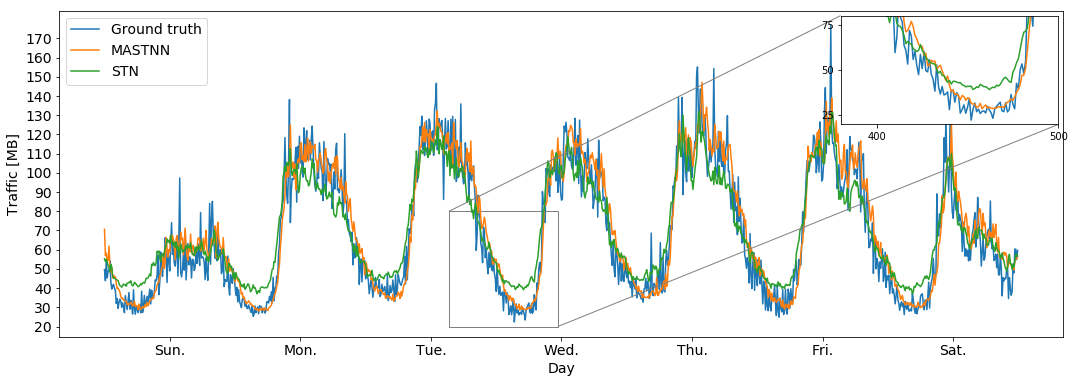

In [628]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset 
fig, ax = plt.subplots(figsize=(18,6)) #842

ax.plot(ground, label='Ground truth')
ax.plot(mastnn_p, label='MASTNN')
ax.plot(stn_p, label='STN')
ax.set_xlabel('Day', fontsize=14)
ax.set_ylabel('Traffic [MB]', fontsize=14)
ax.set_xticks(np.array(range(0,1008,144))+72)
ax.set_xticklabels(['Sun.', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.'], fontsize=14)
ax.set_yticks(range(20, 180, 10))
ax.set_yticklabels(range(20, 180, 10), fontsize=14)
ax.legend(fontsize=14, loc=2)

axins = zoomed_inset_axes(ax, 2, loc=1, axes_kwargs={'adjustable':'box', 'aspect':1, 'anchor':'NE'})  # zoom = 6
axins.plot(ground)
axins.plot(mastnn_p)
axins.plot(stn_p)

# sub region of the original image
x1, x2, y1, y2 = 380, 500, 20, 80
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
# fix the number of ticks on the inset axes
axins.yaxis.get_major_locator().set_params(nbins=1)
axins.xaxis.get_major_locator().set_params(nbins=1)


# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
#plt.savefig('./trafficPlot1.pdf')
plt.show()